In [11]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style("whitegrid")

Load dataset from the file and show top 5

In [12]:
#headers = ['Population','Profit']
#df = pd.read_csv("ex1data1.txt", ",", names=headers)
#print (df.iloc[0:5])

# reading the file and unpacking the values to X and y
x, y = np.loadtxt("ex1data1.txt", delimiter=',', usecols=(0, 1), unpack=True)

print("X:\n", x[:5], "\n")
print("y:\n", y[:5])

X:
 [6.1101 5.5277 8.5186 7.0032 5.8598] 

y:
 [17.592   9.1302 13.662  11.854   6.8233]


Build initial dataset plot

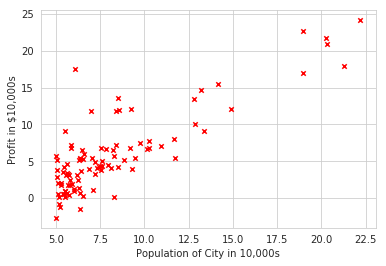

In [13]:
plt.scatter(x, y, marker='x', c='r', s=20)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

In [14]:
# Compute cost for linear regression
def computeCost(x, y, theta):
    sum = 0
    for i in range(0, len(x)):
        h = 0
        for idx, t in enumerate(theta):
            h += x[i][idx] * t
        sum += pow(h - y[i], 2)
    return sum / (2 * len(x))

Prepare input matrix X

In [15]:
X = np.ones((len(x), 2))
X[:,1] = x

Check computeCost function. We should get 

*32.07* when *theta = [0, 0]*

*54.24* when *theta = [-1, 2]*

In [16]:
r1 = computeCost(X, y, [0,0])
r2 = computeCost(X, y, [-1,2])
print(r1, r2)

32.072733877455654 54.24245508201238


In [17]:
# gradient descent calculation
def gradientDescent(X, y, theta, alpha, iterations):
    thetaCur = theta
    cost = np.zeros(iterations)
    thetaHist = np.zeros(iterations)
    
    for iter in range(0, iterations):
        cost[iter] = computeCost(X, y, thetaCur)
        sum = [0] * len(theta)
        for i in range(0, len(X)):
            h = 0
            for idx, t in enumerate(thetaCur):
                h += X[i][idx] * t
            for idx, t in enumerate(thetaCur):
                sum[idx] += (h - y[i]) * X[i][idx]

        for idx, t in enumerate(thetaCur):
            thetaCur[idx] = thetaCur[idx] - (alpha/len(X)) * sum[idx];
            
    return thetaCur, thetaHist, cost

Check gradientDescent function. We expect to get theta *[-3.63, 1.16]* after *1500* iterations and alpha equal to *0.01*

In [18]:
iterations = 1500
gradient, thetaHist, cost = gradientDescent(X, y, [0, 0], 0.01, iterations)
print(gradient)

[-3.63029143940436, 1.166362350335582]


In [19]:
# Hypothesis function
def hypothesis(X, theta):
    h = [0] * len(X)
    for i in range(0, len(X)):
        hTmp = 0.0
        for idx, t in enumerate(theta):
            hTmp += t * X[i][idx]
        h[i] = hTmp
    return h

Display hypothesis plot

In [20]:
plt.scatter(df['Population'],df['Profit'])
plt.xlabel("Population")
plt.ylabel("Profit")

yHypothetical = hypothesis(X, theta)

plt.plot(X[:,1], yHypothetical, color="red")
plt.show()

NameError: name 'df' is not defined

Investigate Cost function

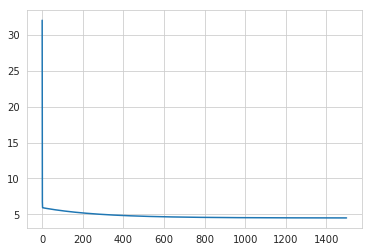

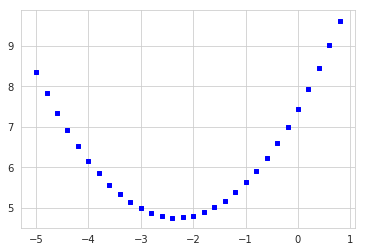

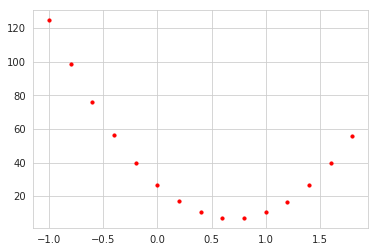

In [21]:
plt.plot(np.arange(iterations), cost)
#plt.set_xlabel("Iterations")
#plt.set_ylabel(r"Cost function - $J(\theta)$");
plt.show()

a = []
b = []

for i in np.arange(-5, 1, 0.2):
    a.append(i)
    b.append(computeCost(X, y, [i, 1]))

plt.scatter(a, b, s=10, c='b', marker="s", label='theta0')
plt.show()

a = []
b = []

for i in np.arange(-1, 2, 0.2):
    a.append(i)
    b.append(computeCost(X, y, [1, i]))

plt.scatter(a, b, s=10, c='r', marker="o", label='theta1')
plt.show()

As we can see, we had computed theta with some error. There are two ways - increase iterations amount or decrease alpha value.

Second dataset

In [22]:
data = np.loadtxt("ex1data2.txt", delimiter=',')
x, y = data[:,:2], data[:,2]

print("x:\n", x[:5], "\n")
print("y:\n", y[:5])

x:
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]] 

y:
 [399900. 329900. 369000. 232000. 539900.]


Feature normalization

In [23]:
def featureNormalize(X):
    rows, columns = X.shape
    mean = [0] * 3
    min =  [np.nan] * columns
    max =  [np.nan] * columns
    sigma = [0] * columns
    for i in range(0, rows):
         for ii in range(0, columns):
            mean[ii] += X[i,ii]
            if (np.isnan(min[ii]) or X[i,ii] < min[ii]):
                min[ii] = X[i,ii]
            if (np.isnan(max[ii]) or X[i,ii] > max[ii]):
                max[ii] = X[i,ii]
                
    for i in range(0, columns):
        mean[i] = mean[i] / rows
        sigma[i] = max[i] - min[i]

    result = X.copy()
    for i in range(0, rows):
        for ii in range(0, columns):
            if (sigma[ii] == 0):
                result[i, ii] = np.nan
            else:
                result[i, ii] = (result[i, ii] - mean[ii]) / sigma[ii]
    return result, mean, sigma
    #return (X - X.mean()) / (X.max() - X.min())

In [24]:
normX, mean, sigma = featureNormalize(x)

X = np.hstack((np.ones((x.shape[0],1)), normX))

print(X[:5])

[[ 1.          0.02849397 -0.04255319]
 [ 1.         -0.11050217 -0.04255319]
 [ 1.          0.11012663 -0.04255319]
 [ 1.         -0.16124679 -0.29255319]
 [ 1.          0.27559822  0.20744681]]


In [40]:
gradient, thetaHist, cost = gradientDescent(X, y, [0, 0, 0], 0.1, 1500)
print(gradient)

[340412.65957446786, 490097.7967569283, -16120.5586845665]


In [27]:
price = 1 * gradient[0] + \
    ((1650 - mean[1])/(X[:,1].max() - X[:,1].min())) * gradient[1] + \
    ((3 - mean[2])/(X[:,2].max() - X[:,2].min())) * gradient[2]
print(price)

807399701.3406061


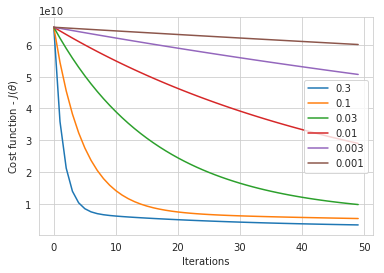

In [42]:
learningRates = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

plt.xlabel("Iterations")
plt.ylabel(r"Cost function - $J(\theta)$")

for alpha in learningRates:
    gradient, thetaHist, cost = gradientDescent(X, y, [0, 0, 0], alpha, 50)
    plt.plot(np.arange(50), cost)
    
plt.legend(learningRates)
plt.show()